# Importing necessary libraries

In [ ]:
#| label: imports
"""
to replicate the results run:
`pip/conda install numpy==1.26.4 matplotlib==3.8.4`
"""
import numpy as np
import matplotlib.pyplot as plt

# Defining the functions

## Euclidean length (L2 norm) of the sampled set

In [3]:
#| label: euclidean_length

# by default np.linalg.norm computes the L2 norm (Euclidean length)
# we set axis = 1 because our samples are our rows
def average_euclidean_length(x):
    return np.mean(np.linalg.norm(x, axis=1))

def variance_euclidean_length(x):
    # we set ddof=1 to match R’s var (dividing by n-1 instead of n)
    return np.var(np.linalg.norm(x, axis=1), ddof=1)


## Euclidean distance (L2 norm) between the sampled sets

In [4]:
#| label: euclidean_distance

# compute average euclidean distances between matrices x and x2 (rows = samples)
def average_euclidean_distances(x, x2):
    z = []
    for i in range(x.shape[0]):
        # x[i] has shape (p,), x2 has shape (n, p); broadcasting gives (n, p)
        diffs = x[i] - x2
        # each row of diffs is x[i] - x2[j]
        for row in diffs:
            z.append(np.linalg.norm(row))
    return np.mean(z)

# compute variance of euclidean distances between matrices x and x2 
def variance_euclidean_distances(x, x2):
    z = []
    for i in range(x.shape[0]):
        diffs = x[i] - x2
        for row in diffs:
            z.append(np.linalg.norm(row))
    return np.var(z, ddof=1)


## Inner product between the sampled sets

In [ ]:
#| label: inner_product

# compute average inner products between matrices x and x2 (rows = samples)
def average_inner_product(x, x2):
    z = []
    for i in range(x.shape[0]):
        inner_vals = x2.dot(x[i])
        for val in inner_vals:
            z.append(val)
    return np.mean(z)

# compute variance of inner products between matrices x and x2 (rows = samples)
def variance_inner_product(x, x2):
    z = []
    for i in range(x.shape[0]):
        inner_vals = x2.dot(x[i])
        for val in inner_vals:
            z.append(val)
    return np.var(z, ddof=1)


# Looping over various dimensionality options

In [8]:
#| label: loop_over_p

np.random.seed(509) # setting seed for reproducibility

p_range = 2 ** np.arange(0, 11)  # [1, 2, 4, ..., 1024]
n = 100

avg_eucl_length = []
var_eucl_length = []
avg_eucl_dist   = []
var_eucl_dist   = []
avg_inner_prod  = []
var_inner_prod  = []

for p in p_range:
    # sample x and x2 ~ N(0, I_p) with n rows each
    x  = np.random.multivariate_normal(mean=np.zeros(p), cov=np.eye(p), size=n)
    x2 = np.random.multivariate_normal(mean=np.zeros(p), cov=np.eye(p), size=n)
    
    avg_eucl_length.append(average_euclidean_length(x))
    var_eucl_length.append(variance_euclidean_length(x))
    avg_eucl_dist.append(average_euclidean_distances(x, x2))
    var_eucl_dist.append(variance_euclidean_distances(x, x2))
    avg_inner_prod.append(average_inner_product(x, x2))
    var_inner_prod.append(variance_inner_product(x, x2))

# Visual inspection

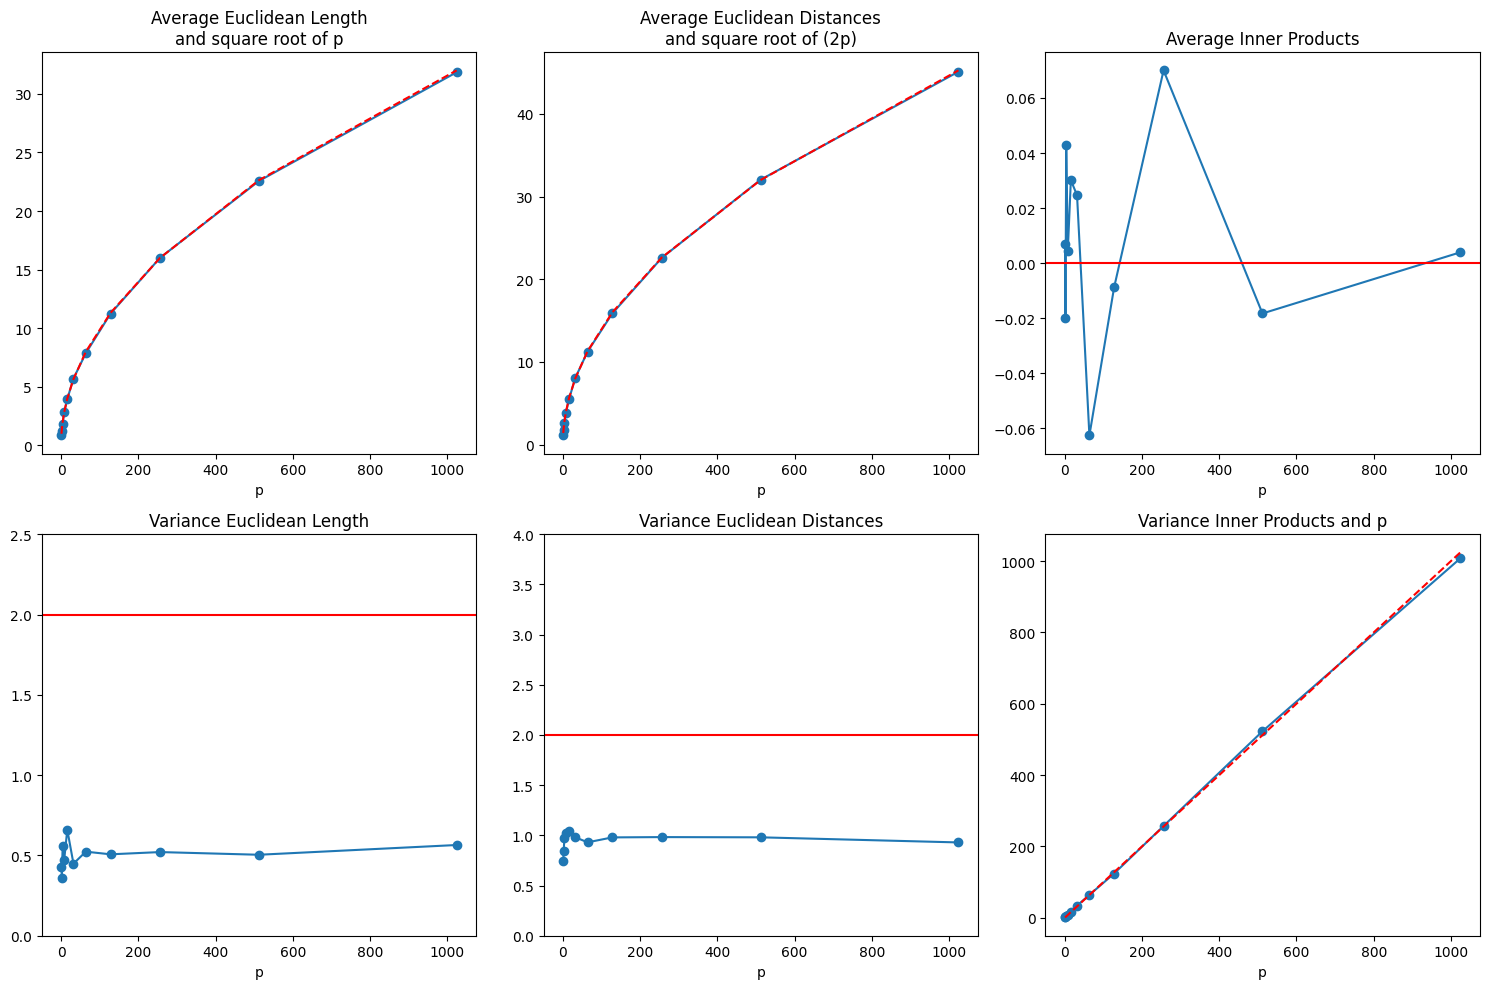

In [10]:
#| label: plots

# compare the results visually
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Average Euclidean Length vs. sqrt(p)
axs[0, 0].plot(p_range, avg_eucl_length, marker='o')
axs[0, 0].plot(p_range, np.sqrt(p_range), color='red', linestyle='--')
axs[0, 0].set_title("Average Euclidean Length\nand square root of p")
axs[0, 0].set_xlabel("p")

# Average Euclidean Distances vs. sqrt(2p)
axs[0, 1].plot(p_range, avg_eucl_dist, marker='o')
axs[0, 1].plot(p_range, np.sqrt(2 * p_range), color='red', linestyle='--')
axs[0, 1].set_title("Average Euclidean Distances\nand square root of (2p)")
axs[0, 1].set_xlabel("p")

# Average Inner Products (with reference line at 0)
axs[0, 2].plot(p_range, avg_inner_prod, marker='o')
axs[0, 2].axhline(0, color='red')
axs[0, 2].set_title("Average Inner Products")
axs[0, 2].set_xlabel("p")

# Variance of Euclidean Length (with reference line at 2)
axs[1, 0].plot(p_range, var_eucl_length, marker='o')
axs[1, 0].axhline(2, color='red')
axs[1, 0].set_title("Variance Euclidean Length")
axs[1, 0].set_xlabel("p")
axs[1, 0].set_ylim(0, 2.5)

# Variance of Euclidean Distances (with reference line at 2)
axs[1, 1].plot(p_range, var_eucl_dist, marker='o')
axs[1, 1].axhline(2, color='red')
axs[1, 1].set_title("Variance Euclidean Distances")
axs[1, 1].set_xlabel("p")
axs[1, 1].set_ylim(0, 4)

# Variance of Inner Products vs. p
axs[1, 2].plot(p_range, var_inner_prod, marker='o')
axs[1, 2].plot(p_range, p_range, color='red', linestyle='--')
axs[1, 2].set_title("Variance Inner Products and p")
axs[1, 2].set_xlabel("p")

plt.tight_layout()
plt.show()

# Interpretation of plots

The plots confirm our results from the previous subpoints.
1. Average Euclidean Length - matches almost perfectly with $\sqrt{p}$, showing that as dimensionality increases, the average length of a Gaussian vector grows on the order of $\sqrt{p}$. 
2. Variance Euclidean Length - unlike the average, the variance does not grow with dimensionality, and never exceeds 2, indicating that the distribution of lengths remains stable regardless of dimensionality.
3. Average Euclidean distance - aligns almost exactly with $\sqrt{2p}$, showing that as dimensionality increases, two independent Gaussian vectors move apart on the order of $\sqrt{2p}$.
4. Variance Euclidean distance - as we saw for the variance of the lengths, the variance of the distances does not grow with dimensionality as well and never exceeds 2.
5. Average inner product - the average inner product is close to 0, some fluctuations still appear due to randomness, but the range of values on the y-axis is quite small.
6. Variance inner product - unlike the other variances, the variance of the inner product grows with dimensionality (in a perfect linear way)

# Full code

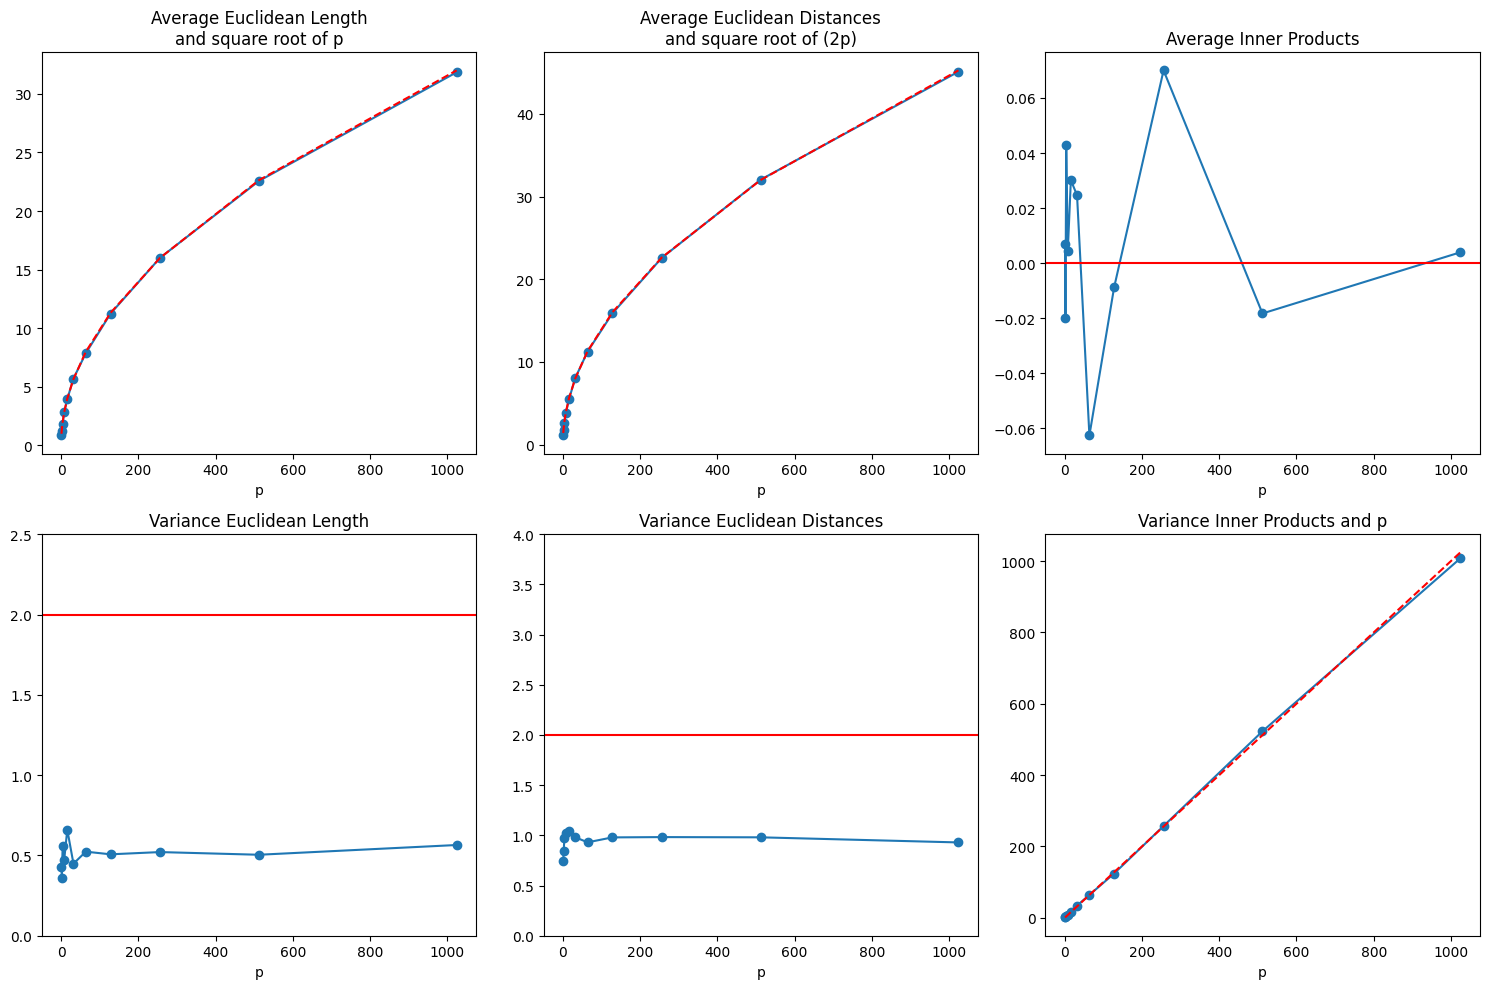

In [11]:
#| label: full_code
"""
to replicate the results run:
`pip/conda install numpy==1.26.4 matplotlib==3.8.4`
"""
import numpy as np
import matplotlib.pyplot as plt

# by default np.linalg.norm computes the L2 norm (Euclidean length)
# we set axis = 1 because our samples are our rows
def average_euclidean_length(x):
    return np.mean(np.linalg.norm(x, axis=1))

def variance_euclidean_length(x):
    # we set ddof=1 to match R’s var (dividing by n-1 instead of n)
    return np.var(np.linalg.norm(x, axis=1), ddof=1)
  
# compute average euclidean distances between matrices x and x2 (rows = samples)
def average_euclidean_distances(x, x2):
    z = []
    for i in range(x.shape[0]):
        # x[i] has shape (p,), x2 has shape (n, p); broadcasting gives (n, p)
        diffs = x[i] - x2
        # each row of diffs is x[i] - x2[j]
        for row in diffs:
            z.append(np.linalg.norm(row))
    return np.mean(z)

# compute variance of euclidean distances between matrices x and x2 
def variance_euclidean_distances(x, x2):
    z = []
    for i in range(x.shape[0]):
        diffs = x[i] - x2
        for row in diffs:
            z.append(np.linalg.norm(row))
    return np.var(z, ddof=1)

# compute average inner products between matrices x and x2 (rows = samples)
def average_inner_product(x, x2):
    z = []
    for i in range(x.shape[0]):
        inner_vals = x2.dot(x[i])
        for val in inner_vals:
            z.append(val)
    return np.mean(z)

# compute variance of inner products between matrices x and x2 (rows = samples)
def variance_inner_product(x, x2):
    z = []
    for i in range(x.shape[0]):
        inner_vals = x2.dot(x[i])
        for val in inner_vals:
            z.append(val)
    return np.var(z, ddof=1)

np.random.seed(509) # setting seed for reproducibility

p_range = 2 ** np.arange(0, 11)  # [1, 2, 4, ..., 1024]
n = 100

avg_eucl_length = []
var_eucl_length = []
avg_eucl_dist   = []
var_eucl_dist   = []
avg_inner_prod  = []
var_inner_prod  = []

for p in p_range:
    # sample x and x2 ~ N(0, I_p) with n rows each
    x  = np.random.multivariate_normal(mean=np.zeros(p), cov=np.eye(p), size=n)
    x2 = np.random.multivariate_normal(mean=np.zeros(p), cov=np.eye(p), size=n)
    
    avg_eucl_length.append(average_euclidean_length(x))
    var_eucl_length.append(variance_euclidean_length(x))
    avg_eucl_dist.append(average_euclidean_distances(x, x2))
    var_eucl_dist.append(variance_euclidean_distances(x, x2))
    avg_inner_prod.append(average_inner_product(x, x2))
    var_inner_prod.append(variance_inner_product(x, x2))

# compare the results visually
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Average Euclidean Length vs. sqrt(p)
axs[0, 0].plot(p_range, avg_eucl_length, marker='o')
axs[0, 0].plot(p_range, np.sqrt(p_range), color='red', linestyle='--')
axs[0, 0].set_title("Average Euclidean Length\nand square root of p")
axs[0, 0].set_xlabel("p")

# Average Euclidean Distances vs. sqrt(2p)
axs[0, 1].plot(p_range, avg_eucl_dist, marker='o')
axs[0, 1].plot(p_range, np.sqrt(2 * p_range), color='red', linestyle='--')
axs[0, 1].set_title("Average Euclidean Distances\nand square root of (2p)")
axs[0, 1].set_xlabel("p")

# Average Inner Products (with reference line at 0)
axs[0, 2].plot(p_range, avg_inner_prod, marker='o')
axs[0, 2].axhline(0, color='red')
axs[0, 2].set_title("Average Inner Products")
axs[0, 2].set_xlabel("p")

# Variance of Euclidean Length (with reference line at 2)
axs[1, 0].plot(p_range, var_eucl_length, marker='o')
axs[1, 0].axhline(2, color='red')
axs[1, 0].set_title("Variance Euclidean Length")
axs[1, 0].set_xlabel("p")
axs[1, 0].set_ylim(0, 2.5)

# Variance of Euclidean Distances (with reference line at 2)
axs[1, 1].plot(p_range, var_eucl_dist, marker='o')
axs[1, 1].axhline(2, color='red')
axs[1, 1].set_title("Variance Euclidean Distances")
axs[1, 1].set_xlabel("p")
axs[1, 1].set_ylim(0, 4)

# Variance of Inner Products vs. p
axs[1, 2].plot(p_range, var_inner_prod, marker='o')
axs[1, 2].plot(p_range, p_range, color='red', linestyle='--')
axs[1, 2].set_title("Variance Inner Products and p")
axs[1, 2].set_xlabel("p")

plt.tight_layout()
plt.show()